In [65]:
# Introduction
# we'll be exploring a set of data involving some banking information. This set specifically references customer churn, which means whether the customer has
# left the bank institution or not. I'll be clustering the data in an attempt to see if we can identify customers at risk of churning and possibly identify
# areas for a bank to focus on to retain customers.

# What is clustering?
# Clustering is a way we can group similar data points together based on features of the data. We can use this to gleam more information and find trends
# in the data that aren't necessarily obvious at first glance. It's unsupervised, so that means it doesnt rely on the labels of our data in its groupings
# K-means groups the data points based off of their distance from (or proximity to) a specific centroid of a group.
# Agglomerative clustering groups data points besed off of similarity to other data points in a heirarchal system until the data belongs to a single 
# cluster at the top!

# Introduce the data
# Our data set can be found on Kaggle at the following link: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
# It includes just over 10000 entries, with the following features: Customer ID, Surname, Credit Score, Geography, Gender, Age, Tenure, Balance, NumOfProducts,
# HasCrCard, IsActiveMember, EstimatedSalary, and Exited. Most of these features are self explanatory, so i'll explain some of the ones that aren't.
# Age: The customer's age, Tenure: The number of years the customer has been with the bank, NumOfProducts: The number of bank products the customer uses
# (e.g., savings account, credit card), HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no), IsActiveMember: Whether the customer is an
# active member, EstimatedSalary: The estimated salary of the customer, Exited: Whether the customer has churned, or left the bank.


# Modelling
# We'll look at both k-means and agglomerative models - I think it'll be good to get the practice with both models!





In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('Churn_Modelling.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [71]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

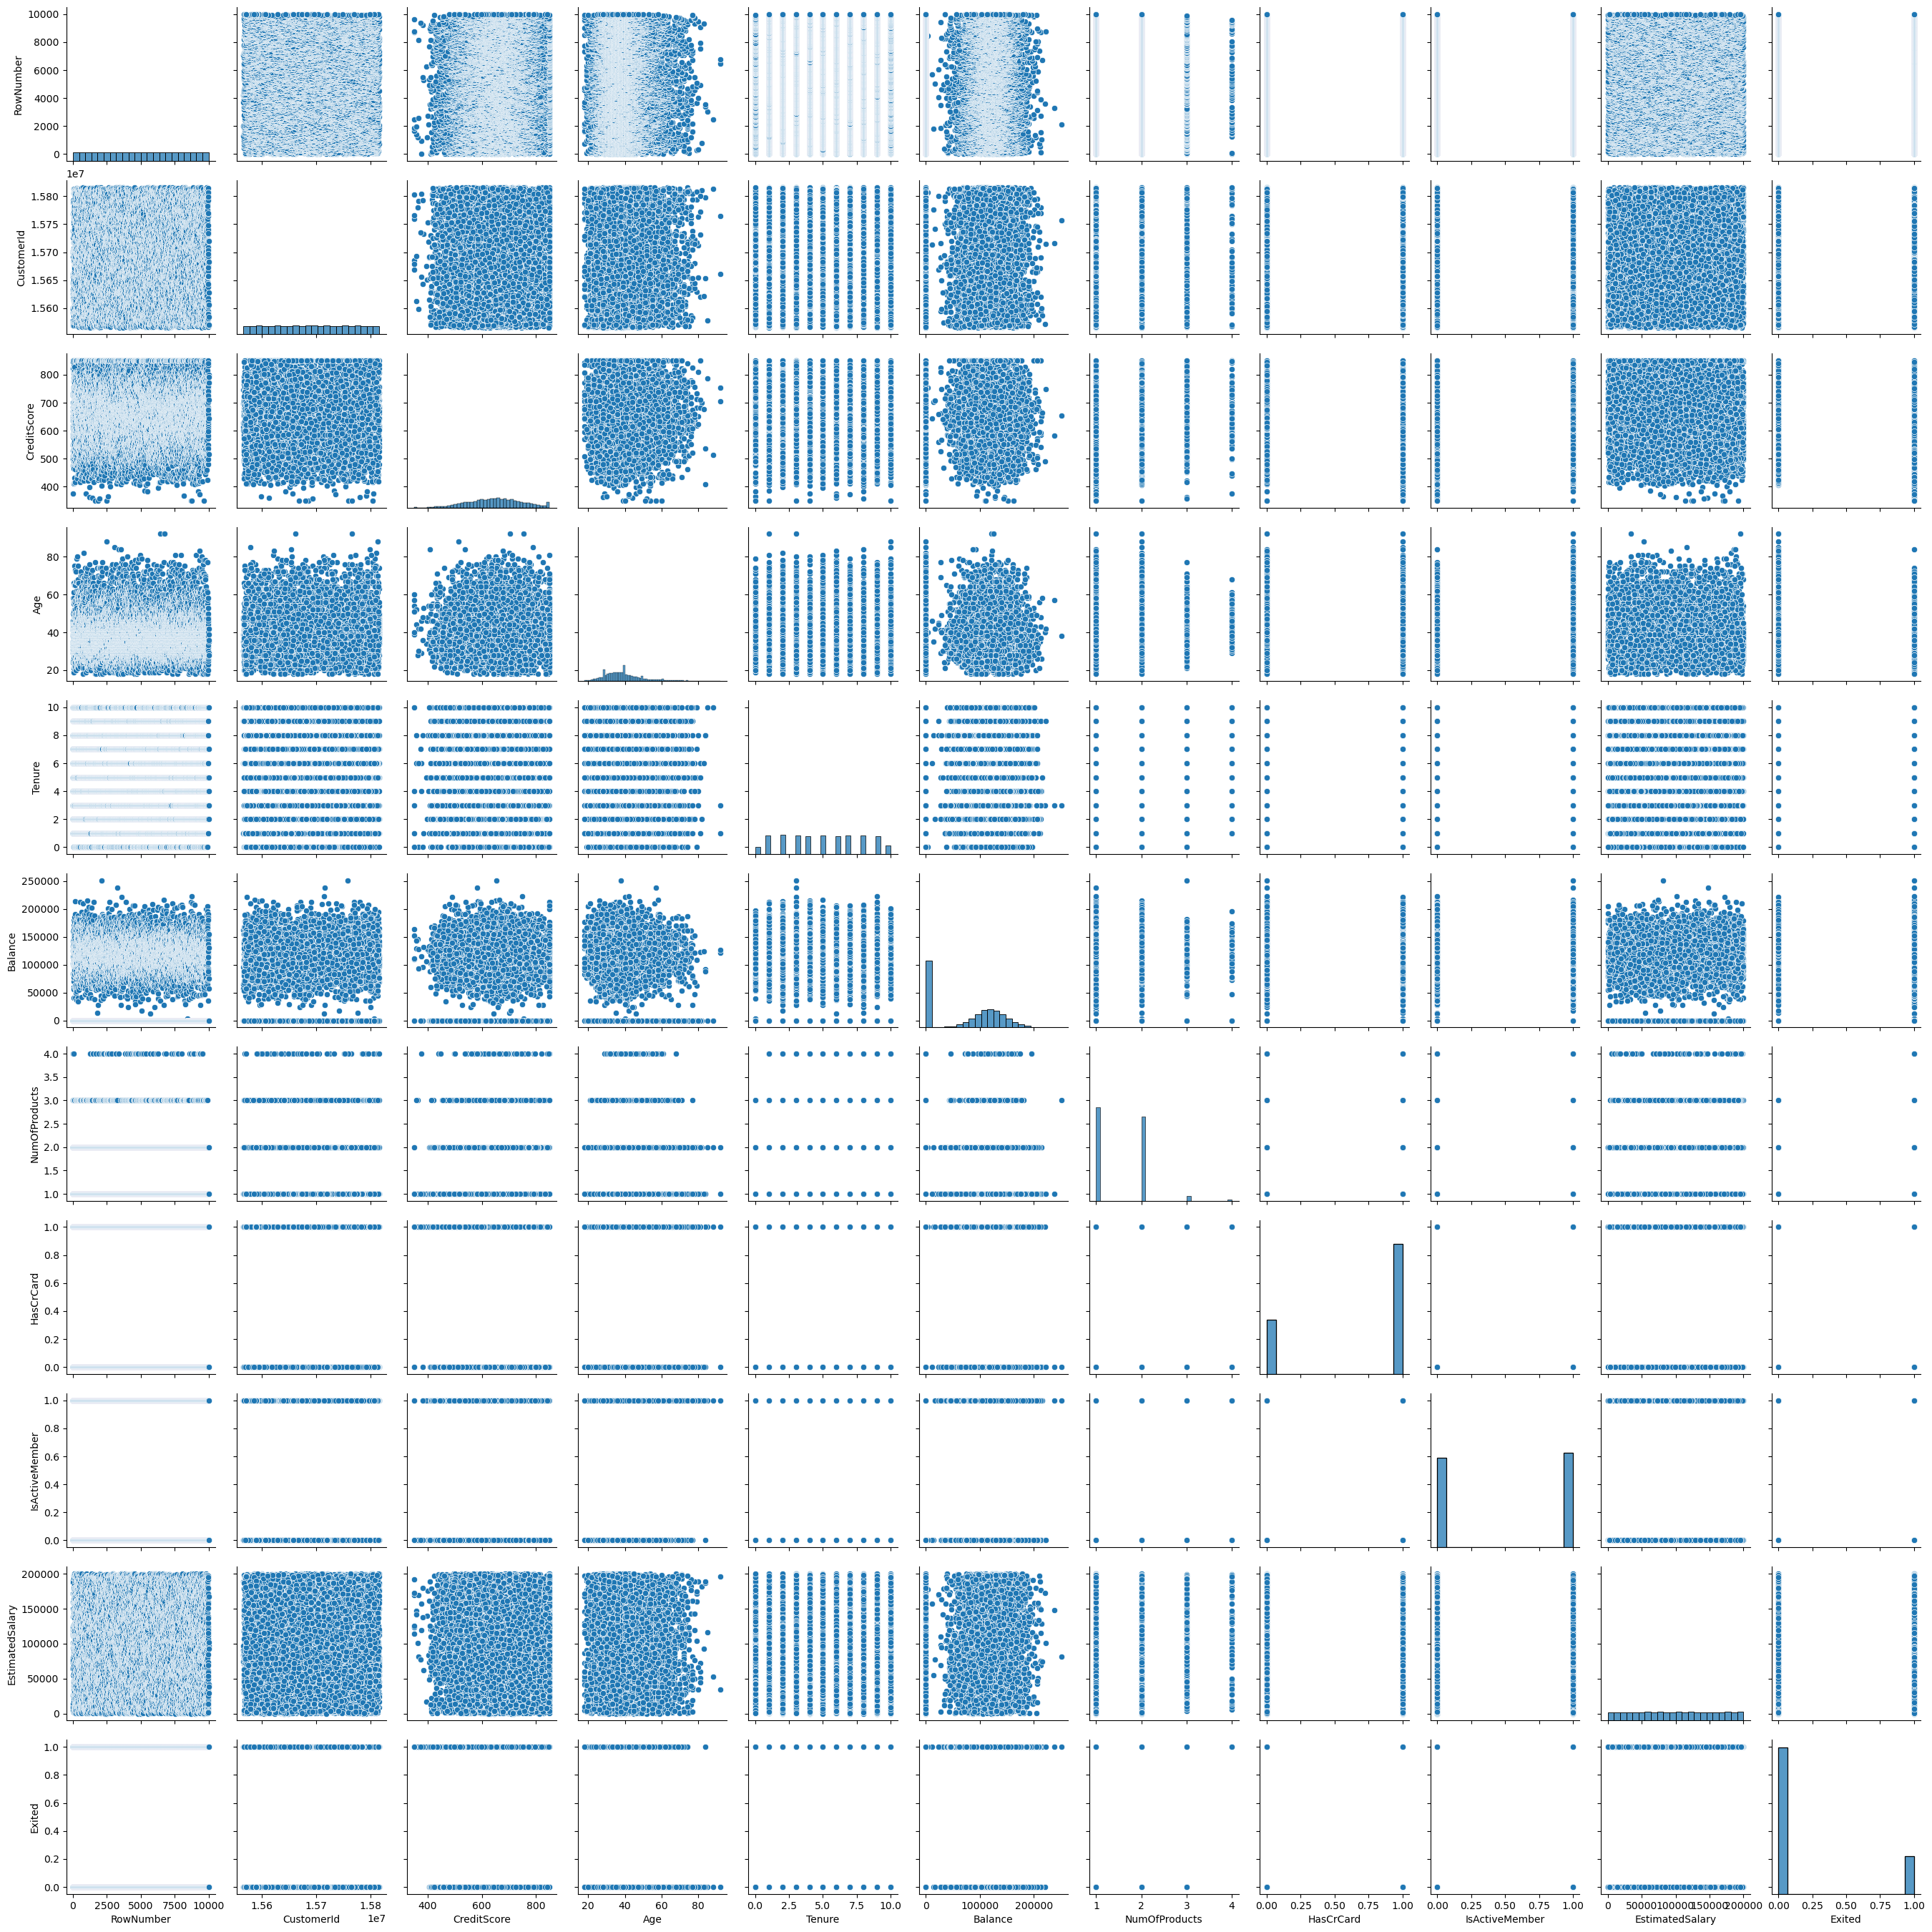

In [73]:
#visualization
# we'll start by looking at the pairplot of the data.
sns.pairplot(df)

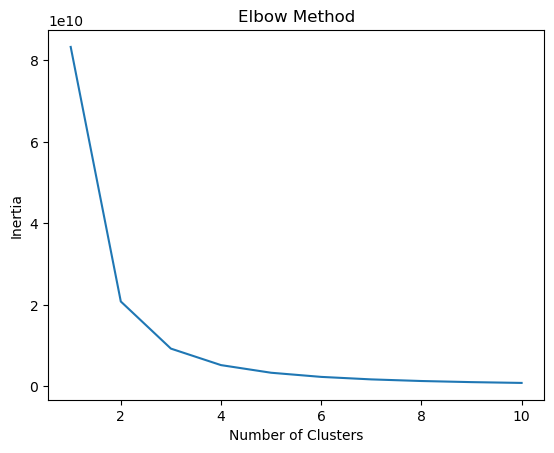

In [74]:
# Preprocessing
# We'll drop null values to make life easier
df = df.dropna()
# We'll be dropping the customer id and surname features
df = df.drop(['CustomerId', 'Surname'], axis=1)
# we'll also be encoding the categorical variables - this splits the geographic locations into the 3 different countries with boolean values
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

#We'll scale our features now so that our features are on the same scale and can provide some actually meaningful/reliable results. K-means is can be
# very susceptible to being skewed by unscaled values.
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# now to choose the number of clusters, we'll use the elbow method (i'll explain this more in the final version - in a slight time crunch rn - sorry!)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop('Exited', axis=1)) 
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [75]:
# K-Means Model
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.drop('Exited', axis=1))

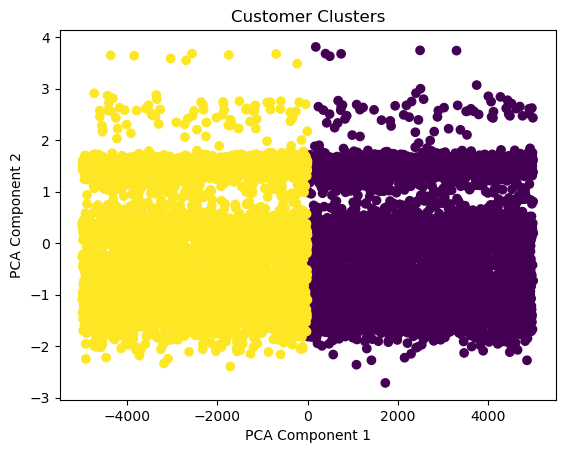

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop('Exited', axis=1))

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [77]:
# I'll also do some agglomerative clustering in the final version, as well as explaining our results!